In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [176]:
raw = pd.read_csv("rank_data.csv", dtype={'Score':float, 'Rate':float, 'Owners':float, 'Share' :float})
data = raw.iloc[:,1:]
print('head:',data.head(),'\nShape:',data.shape)

head:       Score      Rate     Owners     Share
0  5.355458  1.387131   8.431160  0.049185
1  5.418554  0.332962   2.350038  0.015057
2  6.500380  2.068064  10.717820  0.667510
3  5.374041  1.967817   8.547008  1.322974
4  6.433838  1.414230   4.375407  0.060226 
Shape: (305, 4)


            Score        Rate      Owners       Share
count  305.000000  305.000000  305.000000  305.000000
mean     2.487280    1.951408    5.131793    0.307299
std      1.242298    0.729256    2.072689    0.470576
min      1.001870    0.000000    1.000000    0.001004
25%      1.558984    1.535240    3.712688    0.049185
50%      2.177115    2.068064    4.852610    0.158596
75%      3.059878    2.474945    6.044638    0.357344
max      6.500380    3.577994   11.636681    3.394764
Score     0
Rate      0
Owners    0
Share     0
dtype: int64


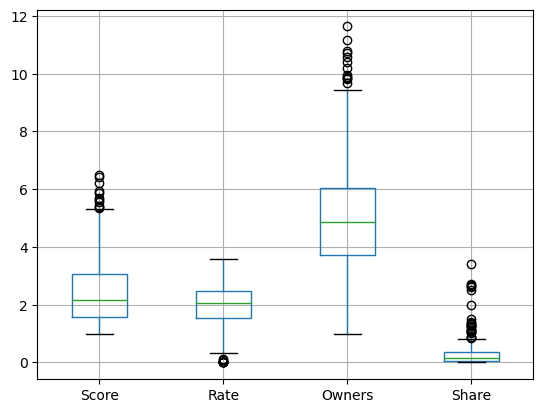

            Unnamed: 0     Score      Rate    Owners     Share
Unnamed: 0    1.000000 -0.894437  0.123377 -0.569416 -0.347437
Score        -0.894437  1.000000 -0.123669  0.561431  0.324444
Rate          0.123377 -0.123669  1.000000  0.132453  0.134490
Owners       -0.569416  0.561431  0.132453  1.000000  0.694850
Share        -0.347437  0.324444  0.134490  0.694850  1.000000


In [177]:
print(data.describe())
print(data[data.isnull()==True].count())

data.boxplot()
plt.savefig("figure/boxplot.jpg")
plt.show()
print(raw.corr())

F:\Software_Installed\Anaconda\envs\Stats_401\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


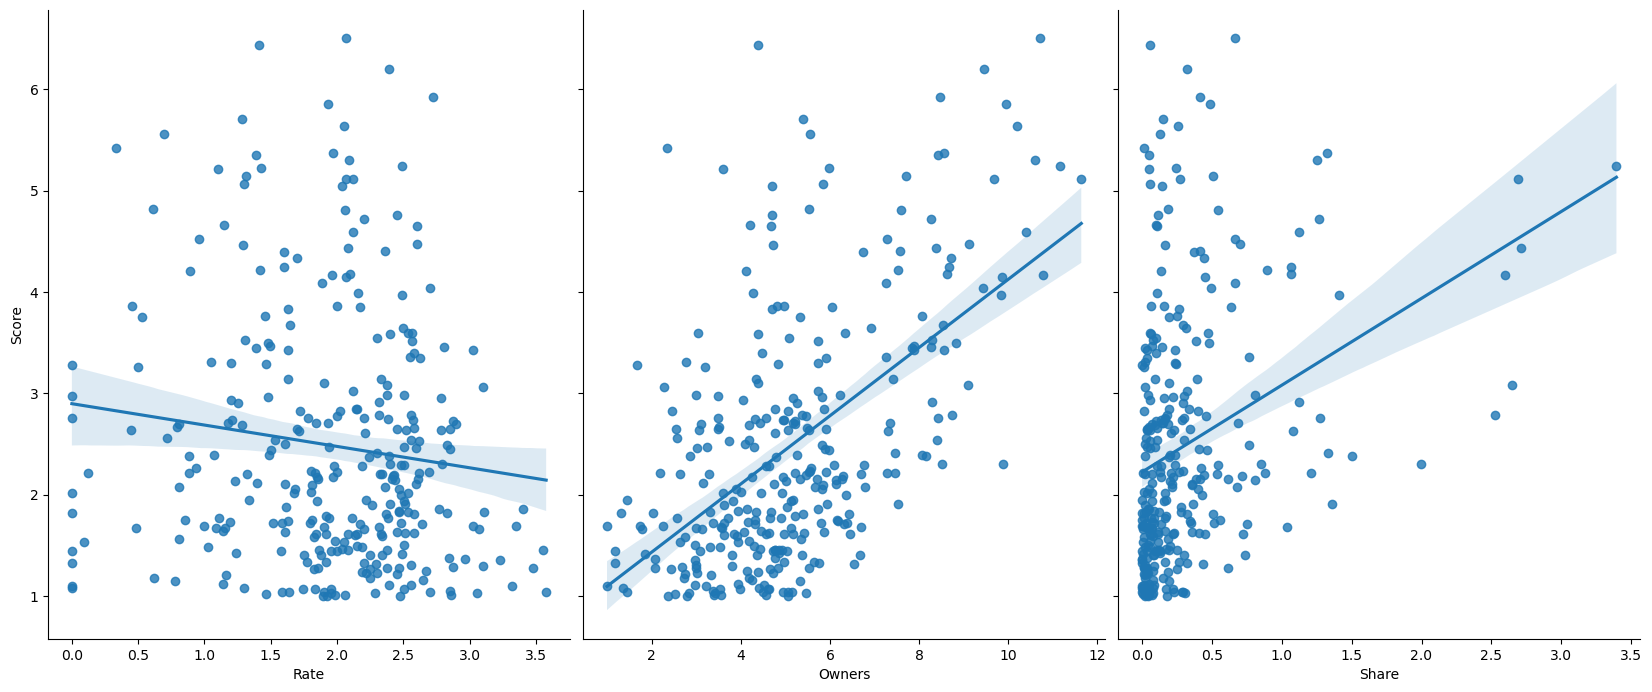

In [178]:
sns.pairplot(data, x_vars=['Rate', 'Owners', 'Share'], y_vars='Score', size=7, aspect=0.8,kind = 'reg')
plt.savefig("pairplot.jpg")
plt.show()

In [179]:
X_train,X_test,Y_train,Y_test = train_test_split(data.iloc[:,:3],data.Score,train_size=.75)

print("原始数据特征:",data.iloc[:,:3].shape,
      ",训练数据特征:",X_train.shape,
      ",测试数据特征:",X_test.shape)

print("原始数据标签:",data.Score.shape,
      ",训练数据标签:",Y_train.shape,
      ",测试数据标签:",Y_test.shape)

原始数据特征: (305, 3) ,训练数据特征: (228, 3) ,测试数据特征: (77, 3)
原始数据标签: (305,) ,训练数据标签: (228,) ,测试数据标签: (77,)


In [180]:
model = LinearRegression()

model.fit(X_train,Y_train)

a  = model.intercept_#截距

b = model.coef_#回归系数

print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 -4.440892098500626e-16 ,回归系数： [1.00000000e+00 2.70026265e-17 2.14082025e-16]


1.0
[1.33180205 2.75754925 1.84456651 6.50037958 2.55843136 1.48346948
 1.40538071 1.37558021 2.29020638 2.41287882 4.64969163 2.21615983
 1.61646173 5.04653238 2.38534262 1.00372909 2.45987635 2.23788815
 2.21817831 1.69101905 1.0411408  2.22289336 2.02801522 2.28518458
 4.72190769 4.81714448 1.58183407 2.98395978 1.31277142 5.70566993
 1.44889116 3.75289842 2.8497083  1.22324521 2.02166117 1.11353477
 2.47242719 1.30135201 5.06521593 5.55616317 1.82760355 1.32962715
 1.28263181 1.07075509 2.07701441 5.11269535 1.87796562 2.15393835
 3.26437566 1.44889116 4.66168573 2.82584375 2.37160283 2.4680071
 4.33836039 3.42465732 4.8065544  1.7248371  1.0824744  3.64799583
 2.75528116 1.5963191  1.91040768 3.13786427 1.48530395 2.71169035
 3.85145359 2.96917634 2.6356369  1.07075509 5.10983836 4.21758743
 2.30517891 1.33606775 1.71481141 2.60801926 2.67322891]


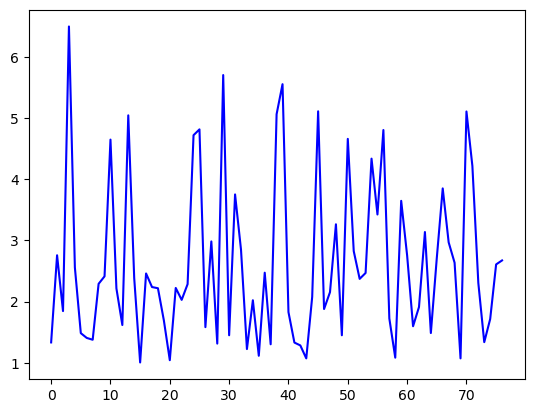

In [181]:
score = model.score(X_test,Y_test)

print(score)

Y_pred = model.predict(X_test)

print(Y_pred)

plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
plt.savefig("figure/predict.jpg")
plt.show()